In [155]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import json
from PIL import Image

In [4]:
# box: yolo, plot with box
def plot_boxes(box,img):
    for bo in box:
        x_center, y_center, w, h = bo
        xtl = int((x_center - w / 2) * img.shape[1])
        ytl = int((y_center - h / 2) * img.shape[0])
        xbr = int((x_center + w / 2) * img.shape[1])
        ybr = int((y_center + h / 2) * img.shape[0])
        
    #    # Draw bounding box
    augmented_image = cv2.rectangle(img, (xtl, ytl), (xbr, ybr), (0, 255, 0), 2)

    # Convert to RGB for displaying with plt
    augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB)

    # Show the augmented image
    plt.imshow(augmented_image)
    return plt.show()


In [238]:
def aug(image, bboxes, category_ids, output_path_img):
    # Define the augmentation pipeline with bounding boxes
    plot_boxes(bboxes,image) # img and box before the transformation

    transform = A.Compose([
        A.Downscale(scale_range=(0.3, 0.8), p=0.5),  # Reduce resolution
        A.HorizontalFlip(p=0.6),
        A.RandomBrightnessContrast(p=0.5, brightness_limit=0.4, contrast_limit=0.4, brightness_by_max=True, ensure_safe_range=True),
        A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.4), #Randomly change hue, saturation and value of the input image.
        A.MotionBlur(blur_limit=7, allow_shifted=True, direction_range=(-1.0, 1.0), angle_range=(0, 360), p=0.5),
        A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), p=0.3),
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))

    augmented = transform(image=image, bboxes=bboxes, category_ids=category_ids)

    # Get the augmented image and bounding boxes
    augmented_image = augmented['image']
    augmented_bboxes = augmented['bboxes']

    # save img
    image = Image.fromarray(cv2.cvtColor(augmented_image.copy(), cv2.COLOR_BGR2RGB).astype('uint8'))
    image.save(output_path_img)

    # Show the augmented image
    plot_boxes(augmented_bboxes, augmented_image)
    
    return (augmented_bboxes,augmented_image, category_ids)



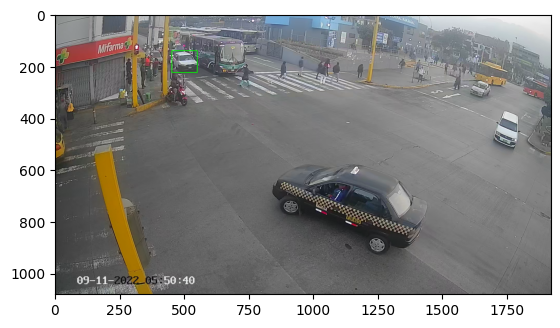

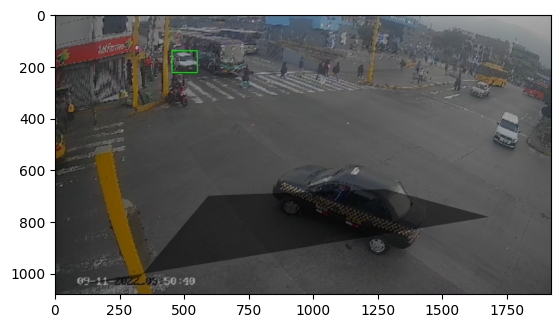

In [260]:
# Example of image and bounding boxes in YOLO format (x_center, y_center, width, height)
image = cv2.imread("../data/dataset/images/video1_frame_1.png")
bboxes = [[0.59471, 0.69869, 0.31857, 0.33333],
        [0.26067, 0.16956, 0.05097, 0.07768]]  # YOLO format: [x_center, y_center, width, height]
category_ids = [0,10]  # Example categories (class labels)
output_path_img = "../data/dataset/ouput.png" #tengo que usar el path dato, tambien especificar de una la salida del tetp


box, img, cate = aug(image, bboxes, category_ids, output_path_img) # falta guardar la imagen, y el text, mas bien agregar al dataset

# Transformation function

In [239]:
def transformation_img(image_path, bboxes, category_ids):

    transform = A.Compose([
        A.Downscale(scale_range=(0.4, 0.8), p=0.5),  # Reduce resolution
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.5, brightness_limit=0.4, contrast_limit=0.4, brightness_by_max=True, ensure_safe_range=True),
        A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.4), #Randomly change hue, saturation and value of the input image.
        A.MotionBlur(blur_limit=7, allow_shifted=True, direction_range=(-1.0, 1.0), angle_range=(0, 360), p=0.5),
        A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), p=0.4),
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))

    image = cv2.imread(image_path)
    augmented = transform(image=image, bboxes=bboxes, category_ids=category_ids)
    
    return (augmented['bboxes'], augmented['image'], category_ids)

In [247]:
names = os.listdir("../data/dataset/labels")
names = [name.split(".")[0] for name in names]

In [251]:
for name in names[:10]:
    label = "../data/dataset/labels/" + name + ".txt"
    image = "../data/dataset/images/"+ name +".png"
    output_path_img = "../data/demo/images/"+ name + "_trans" + ".png"
    output_path_label = "../data/demo/labels/"+ name + "_trans" + ".txt"

    id_classes = []
    boxes = []

    with open(label, "r") as f:
        for line in f:
            parts = line.strip().split()
            id_classes.append(int(parts[0]))
            boxes.append([float(x) for x in parts[1:]])
    
    box, img, id_class = transformation_img(image, boxes, id_classes)

    # save img
    image = Image.fromarray(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB).astype('uint8'))
    image.save(output_path_img)
    # save labels
    with open(output_path_label, "w") as f:
        for id, b in zip(id_class, box):
            # Format the line as: class_id x_center y_center width height
            line = f"{id} {b[0]} {b[1]} {b[2]} {b[3]}\n"
            f.write(line)

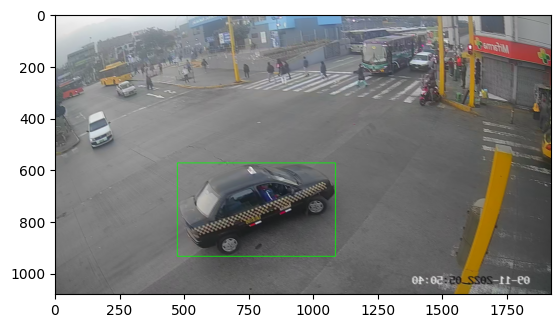

In [259]:
boxes = [[0.40529000759124756, 0.6986899971961975, 0.31857001781463623, 0.33333003520965576]]
plot_boxes(boxes,cv2.imread("../data/demo/images/video1_frame_1_trans.png"))

In [ ]:
for i in os.listdir(""):
    plot_boxes(boxes,cv2.imread("salida.png"))
    plt.imshow()